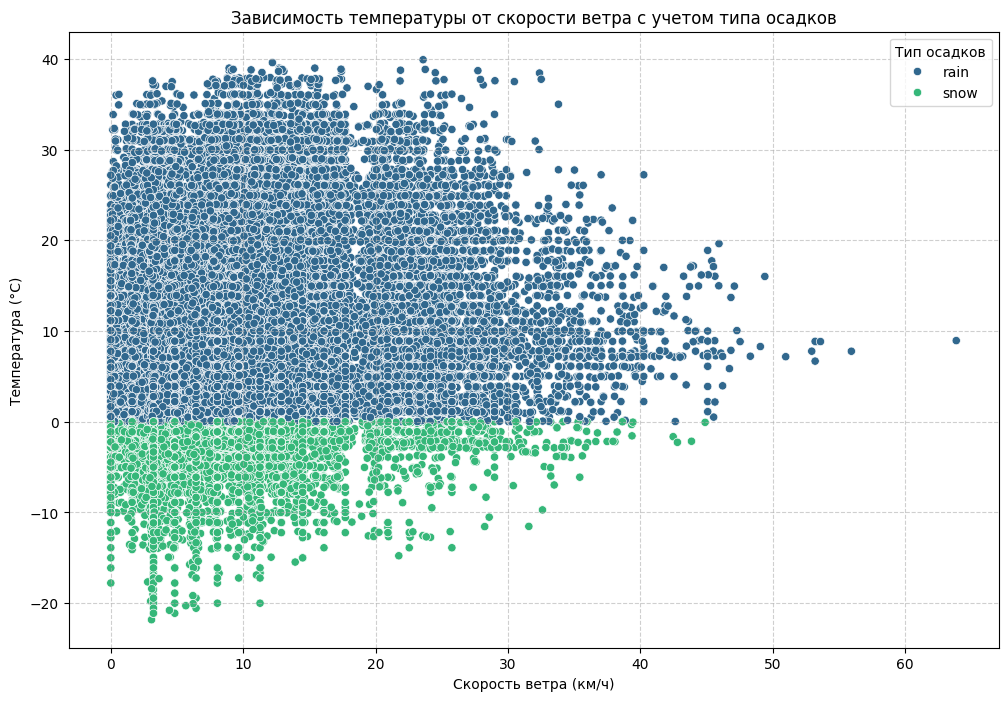

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("weatherHistory_var1.csv")

plt.figure(figsize=(12, 8))
sns.scatterplot(x='Wind Speed (km/h)', y='Temperature (C)', hue='Precip Type', data=df, palette='viridis')
plt.title('Зависимость температуры от скорости ветра с учетом типа осадков')
plt.xlabel('Скорость ветра (км/ч)')
plt.ylabel('Температура (°C)')
plt.legend(title='Тип осадков')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

#Выводы по точечному графику:
# На графике видно, что существует разброс температур при разных скоростях ветра, без выраженной линейной зависимости.
# В основном встречаются точки с дождем (rain), и небольшое число точек со снегом (snow).
# Выше 0 °C встречаются, как правило, точки с дождем.
# При отрицательных температурах встречаются как точки со снегом, так и без осадков, и со снегом как правило встречаются ветра ниже 15 км/ч.
# При скорости ветра около 40 км/ч наблюдаются только точки с дождем и температура выше 15 °C.


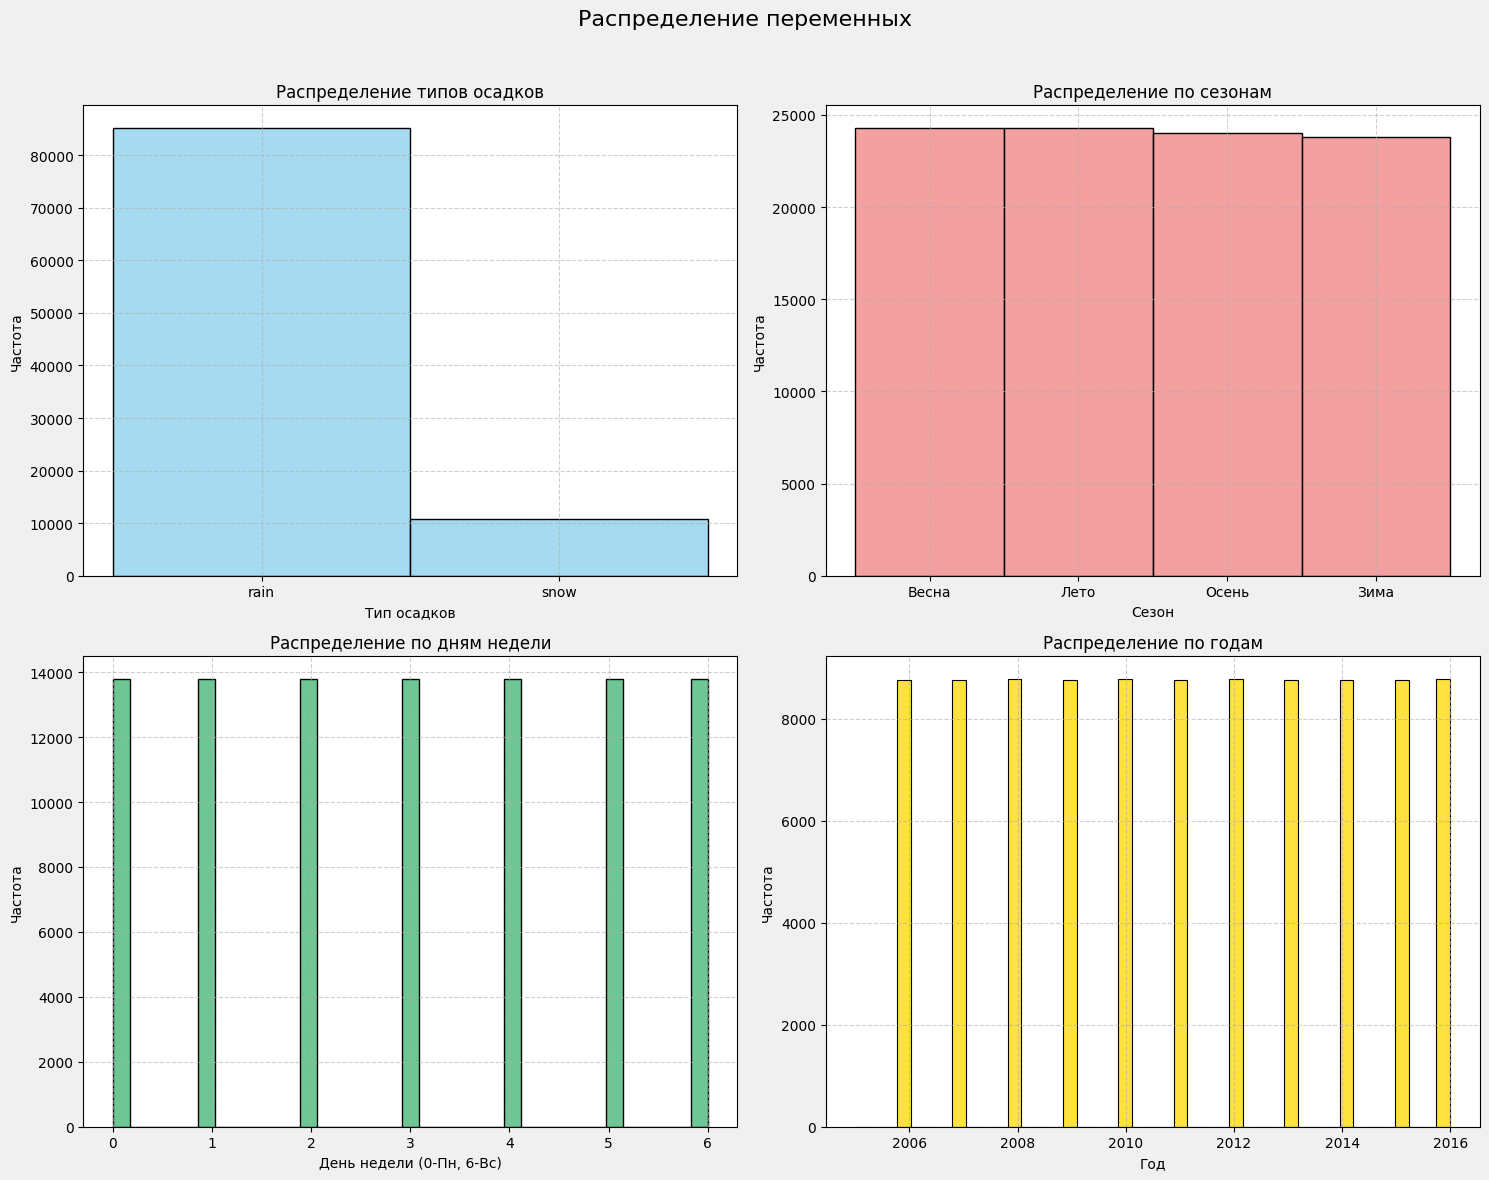

In [ ]:

df = pd.read_csv("weatherHistory_var1.csv")

# Преобразование даты и добавление столбцов
df['Formatted Date'] = pd.to_datetime(df['Formatted Date'], utc=True)
df['Year'] = df['Formatted Date'].dt.year
df['Month'] = df['Formatted Date'].dt.month
df['DayOfWeek'] = df['Formatted Date'].dt.dayofweek  # 0 - понедельник, 6 - воскресенье

# Функция для определения сезона
def get_season(month):
    if month in [12, 1, 2]:
        return 'Зима'
    elif month in [3, 4, 5]:
        return 'Весна'
    elif month in [6, 7, 8]:
        return 'Лето'
    else:
        return 'Осень'

df['Season'] = df['Month'].apply(get_season)


# Создание фигуры и осей
fig, axes = plt.subplots(2, 2, figsize=(15, 12), facecolor="#f0f0f0")
fig.suptitle('Распределение переменных', fontsize=16)

# Задаем цвета для гистограмм
colors = ['skyblue', 'lightcoral', 'mediumseagreen', 'gold']

# 1. Гистограмма для Precip Type
sns.histplot(df['Precip Type'], ax=axes[0, 0], color=colors[0])
axes[0, 0].set_title('Распределение типов осадков')
axes[0, 0].set_xlabel('Тип осадков')
axes[0, 0].set_ylabel('Частота')
axes[0, 0].grid(True, linestyle='--', alpha=0.6)

# 2. Гистограмма для Season
sns.histplot(df['Season'], ax=axes[0, 1], color=colors[1])
axes[0, 1].set_title('Распределение по сезонам')
axes[0, 1].set_xlabel('Сезон')
axes[0, 1].set_ylabel('Частота')
axes[0, 1].grid(True, linestyle='--', alpha=0.6)


# 3. Гистограмма для DayOfWeek
sns.histplot(df['DayOfWeek'], ax=axes[1, 0], color=colors[2])
axes[1, 0].set_title('Распределение по дням недели')
axes[1, 0].set_xlabel('День недели (0-Пн, 6-Вс)')
axes[1, 0].set_ylabel('Частота')
axes[1, 0].set_xticks(range(7))
axes[1, 0].grid(True, linestyle='--', alpha=0.6)

# 4. Гистограмма для Year
sns.histplot(df['Year'], ax=axes[1, 1], color=colors[3])
axes[1, 1].set_title('Распределение по годам')
axes[1, 1].set_xlabel('Год')
axes[1, 1].set_ylabel('Частота')
axes[1, 1].grid(True, linestyle='--', alpha=0.6)
plt.tight_layout(rect=[0, 0, 1, 0.96]) # для того, чтобы suptitle не налезал на график
plt.show()


#Выводы по гистограммам:

#Гистограмма распределения типов осадков (Precip Type):
#Большая часть данных содержит информацию о дождях (rain), в то время как количество

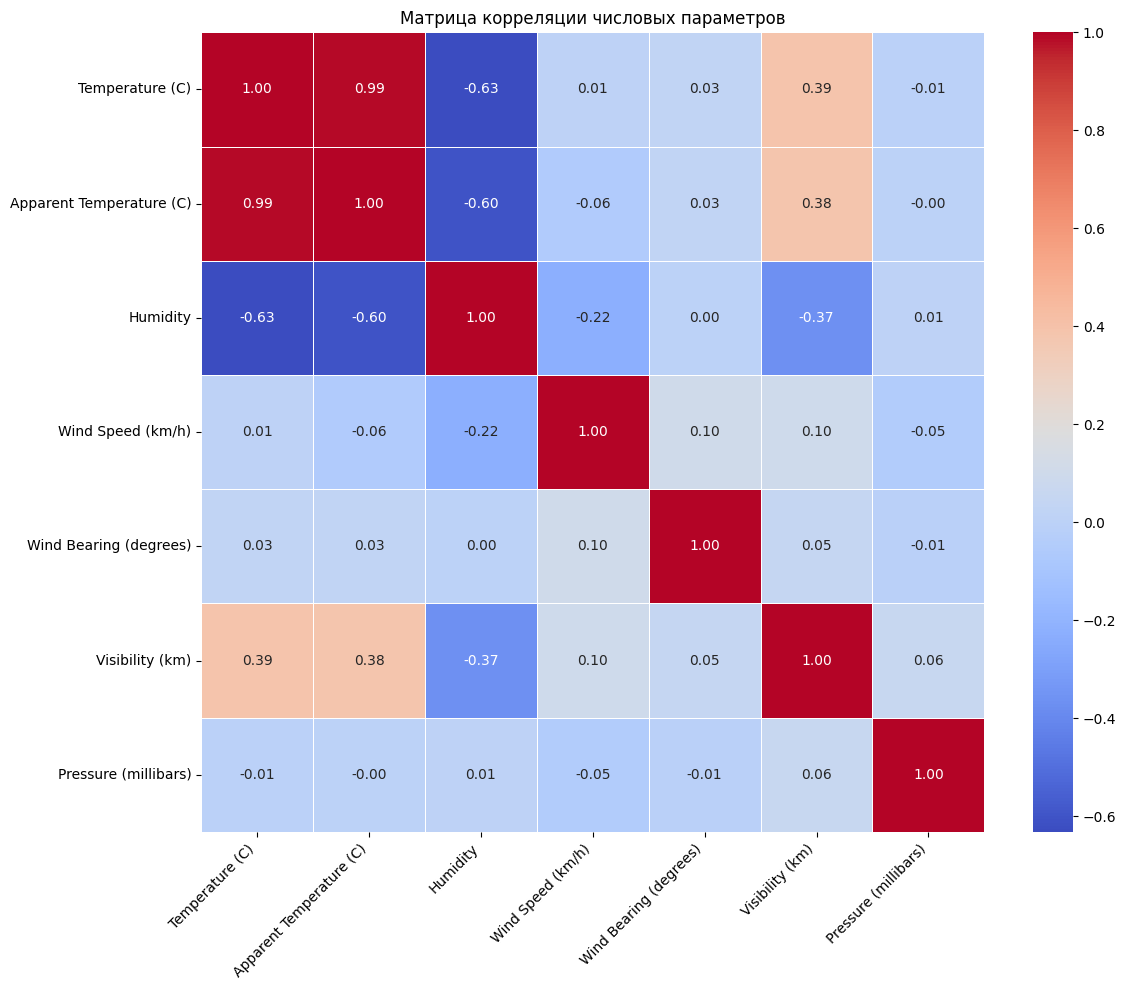

In [ ]:
df = pd.read_csv("weatherHistory_var1.csv")

# Выбор числовых столбцов для корреляции
numeric_cols = ['Temperature (C)', 'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)',
                'Wind Bearing (degrees)', 'Visibility (km)', 'Pressure (millibars)']
df_numeric = df[numeric_cols]

# Расчет матрицы корреляции
corr_matrix = df_numeric.corr()

# Визуализация heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Матрица корреляции числовых параметров')
plt.xticks(rotation=45, ha='right')  # Поворот подписей оси X
plt.yticks(rotation=0)  # Установка вертикального положения подписей оси Y
plt.tight_layout() #Чтобы не обрезались подписи
plt.show()

#"Выводы по тепловой карте корреляции:")
#"-  Температура (C) и Ощущаемая температура (C) имеют сильную положительную корреляцию (0.99), что вполне логично.")
#"- Влажность имеет слабую отрицательную корреляцию с температурой (-0.63) и ощущаемой температурой (-0.60).")
#"- Скорость ветра имеет небольшую отрицательную корреляцию с температурой (-0.05), что, скорее всего не является значимой")
#"- Направление ветра (в градусах) почти не коррелирует с другими переменными.")
#"- Видимость имеет слабую положительную корреляцию с температурой (0.39) и отрицательную с влажностью (-0.37)")
#"- Давление имеет очень слабую корреляцию с остальными переменными, кроме температуры (0.00) и видимости (0.01).")
#"- Сила корреляции между остальными переменными незначительная (ближе к 0).")
#"-  Диагональ матрицы имеет корреляцию 1, как и полагается (параметр коррелирует сам с собой).

<ipython-input-22-8e588d10d700>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Precip Type', y='Temperature (C)', data=df, ax=axes[0], palette="Set2")
<ipython-input-22-8e588d10d700>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Precip Type', y='Pressure (millibars)', data=df, ax=axes[1], palette="Set2")


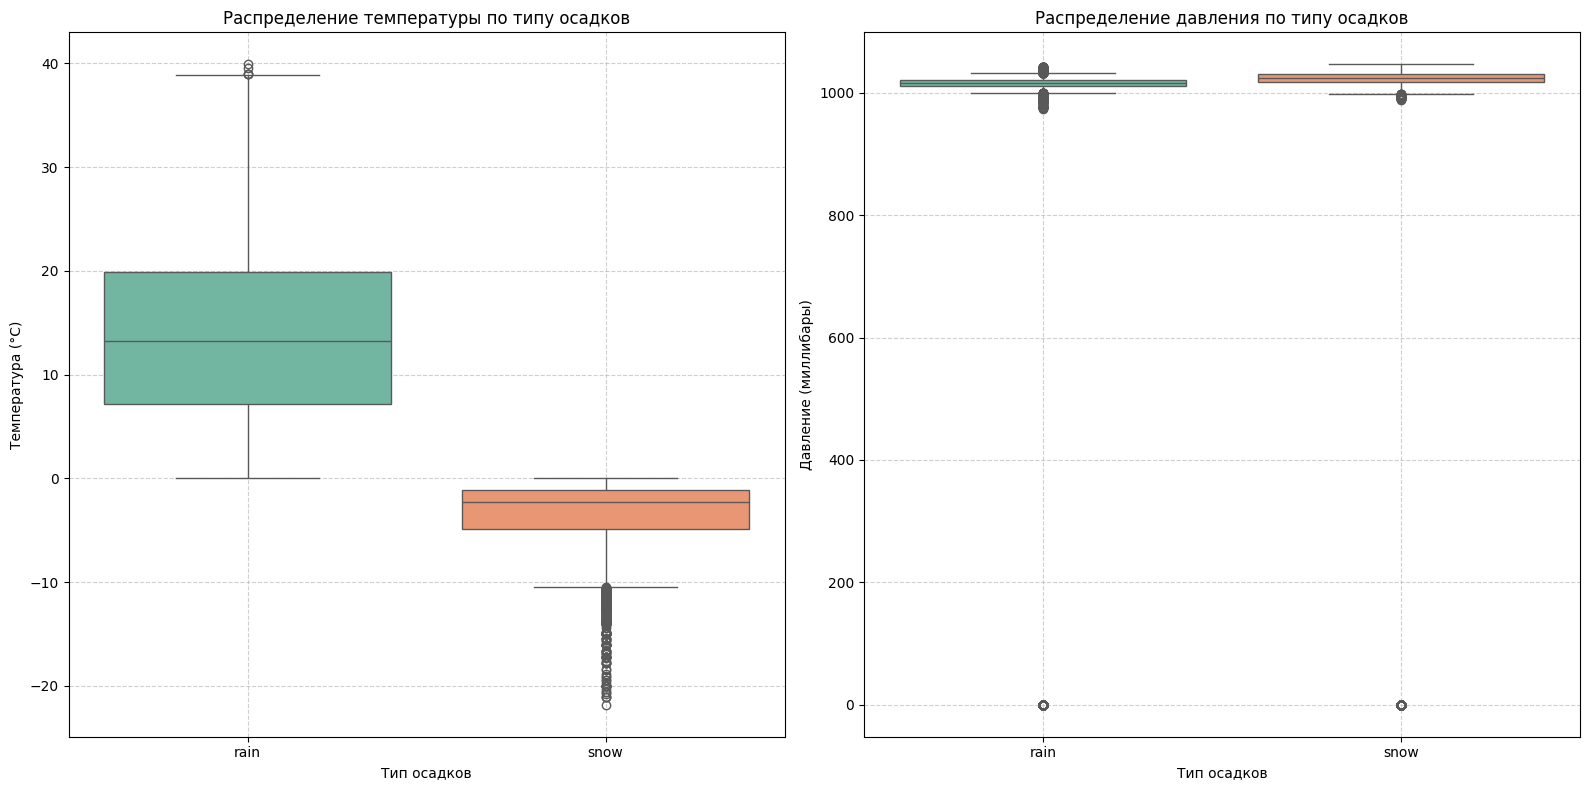

In [ ]:
df = pd.read_csv("weatherHistory_var1.csv")

fig, axes = plt.subplots(1, 2, figsize=(16, 8))

# 1. Boxplot для температуры с учетом типа осадков
sns.boxplot(x='Precip Type', y='Temperature (C)', data=df, ax=axes[0], palette="Set2")
axes[0].set_title('Распределение температуры по типу осадков')
axes[0].set_xlabel('Тип осадков')
axes[0].set_ylabel('Температура (°C)')
axes[0].grid(True, linestyle='--', alpha=0.6)

# 2. Boxplot для давления с учетом типа осадков
sns.boxplot(x='Precip Type', y='Pressure (millibars)', data=df, ax=axes[1], palette="Set2")
axes[1].set_title('Распределение давления по типу осадков')
axes[1].set_xlabel('Тип осадков')
axes[1].set_ylabel('Давление (миллибары)')
axes[1].grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

#"Выводы по графикам boxplot:

#1. Boxplot для температуры с учетом типа осадков:
#-  Наблюдается значительное различие в распределении температуры между типами осадков.
#- Медианная температура для дней с дождем (rain) выше, чем для дней со снегом (snow).
#- Разброс температур больше для дождливых дней, чем для снежных.
#- Есть выбросы при высокой и низкой температуре, но в основном они относятся к дням с дождем.
#-  Для снега температура в основном не выходит за пределы 5 градусов.

#2. Boxplot для давления с учетом типа осадков:
#- Распределение давления по типу осадков имеет небольшое различие
#- Медианное значение давления для дождя и снега достаточно близко.
#- Диапазон давления для обоих типов осадков похож, за исключением того, что у дождя немного больше выбросов.
#"-  С точки зрения давления, оба типа осадков можно считать достаточно похожими.

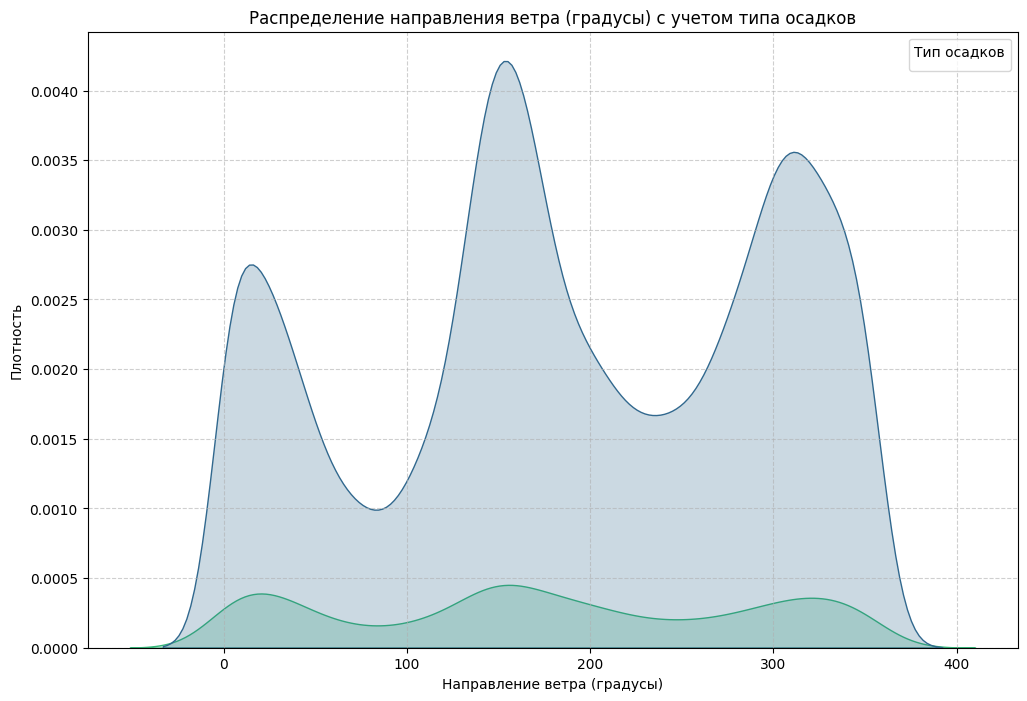

In [ ]:
df = pd.read_csv("weatherHistory_var1.csv")

# Создание графика распределения
plt.figure(figsize=(12, 8))
sns.kdeplot(data=df, x='Wind Bearing (degrees)', hue='Precip Type', fill=True, palette='viridis')
plt.title('Распределение направления ветра (градусы) с учетом типа осадков')
plt.xlabel('Направление ветра (градусы)')
plt.ylabel('Плотность')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(title='Тип осадков')
plt.show()

#Выводы по графику распределения направления ветра:
#-  Распределения направления ветра для дождя (rain) и снега (snow) выглядят относительно равномерными, без выраженных пиков.
#-  Для дождя (rain) наблюдается немного более широкий разброс значений направления ветра.
#-  Для снега (snow) распределение более сконцентрировано, что может указывать на то, что направление ветра во время снегопадов имеет определенные закономерности.
#-  Значения направления ветра распределены по всему диапазону от 0 до 360 градусов для обоих типов осадков, без каких-либо явных преимущественных направлений.
#-  График не показывает какой-то четкой связи между типом осадков и направлением ветра, лишь небольшую разницу в дисперсии.

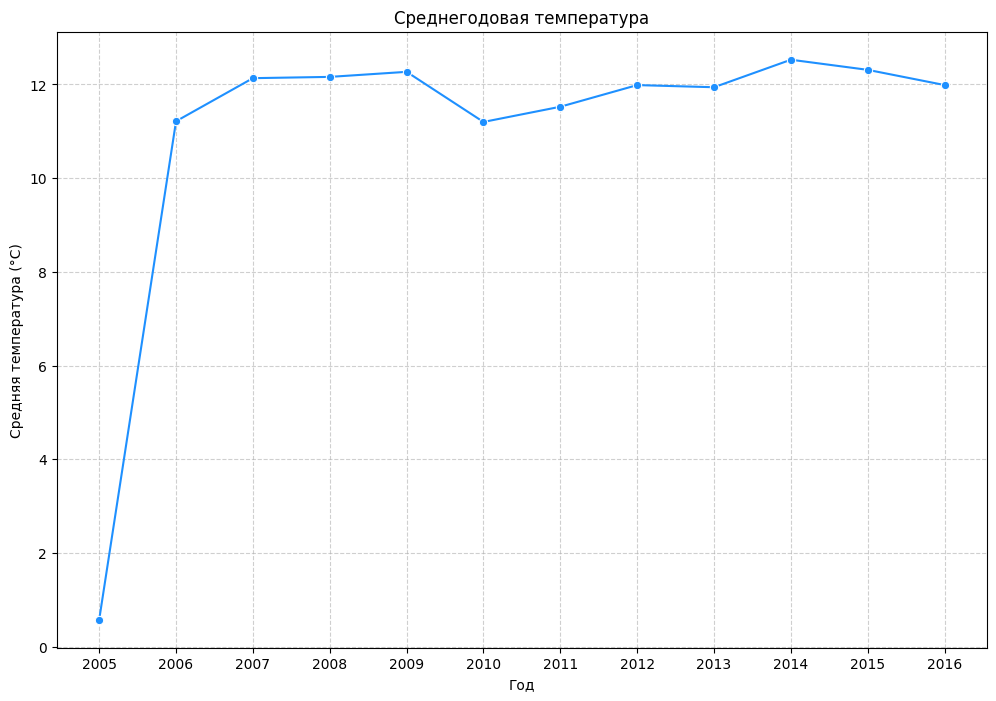

In [ ]:
df = pd.read_csv("weatherHistory_var1.csv")

# Преобразование даты и извлечение года
df['Formatted Date'] = pd.to_datetime(df['Formatted Date'], utc=True)
df['Year'] = df['Formatted Date'].dt.year

# Группировка данных по годам и вычисление средней температуры
yearly_avg_temp = df.groupby('Year')['Temperature (C)'].mean().reset_index()

# Создание линейного графика
plt.figure(figsize=(12, 8))
sns.lineplot(x='Year', y='Temperature (C)', data=yearly_avg_temp, marker='o', color='dodgerblue')
plt.title('Среднегодовая температура')
plt.xlabel('Год')
plt.ylabel('Средняя температура (°C)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(yearly_avg_temp['Year'].unique())
plt.show()

#Выводы по графику среднегодовой температуры:
#-  На графике виден тренд изменения среднегодовой температуры с 2006 по 2016 год.
#- Можно заметить небольшие колебания среднегодовой температуры от года к году.
#- В целом, тренд среднегодовой температуры остается относительно стабильным без существенных изменений.
#-  Не наблюдается сильного роста или спада температуры в течение указанного периода.
#-  График показывает, что в основном средняя температура колеблется в пределах 10-12 градусов.

<ipython-input-20-774085de31de>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Hour', y='Temperature (C)', data=df, palette='Spectral', inner="quartile")


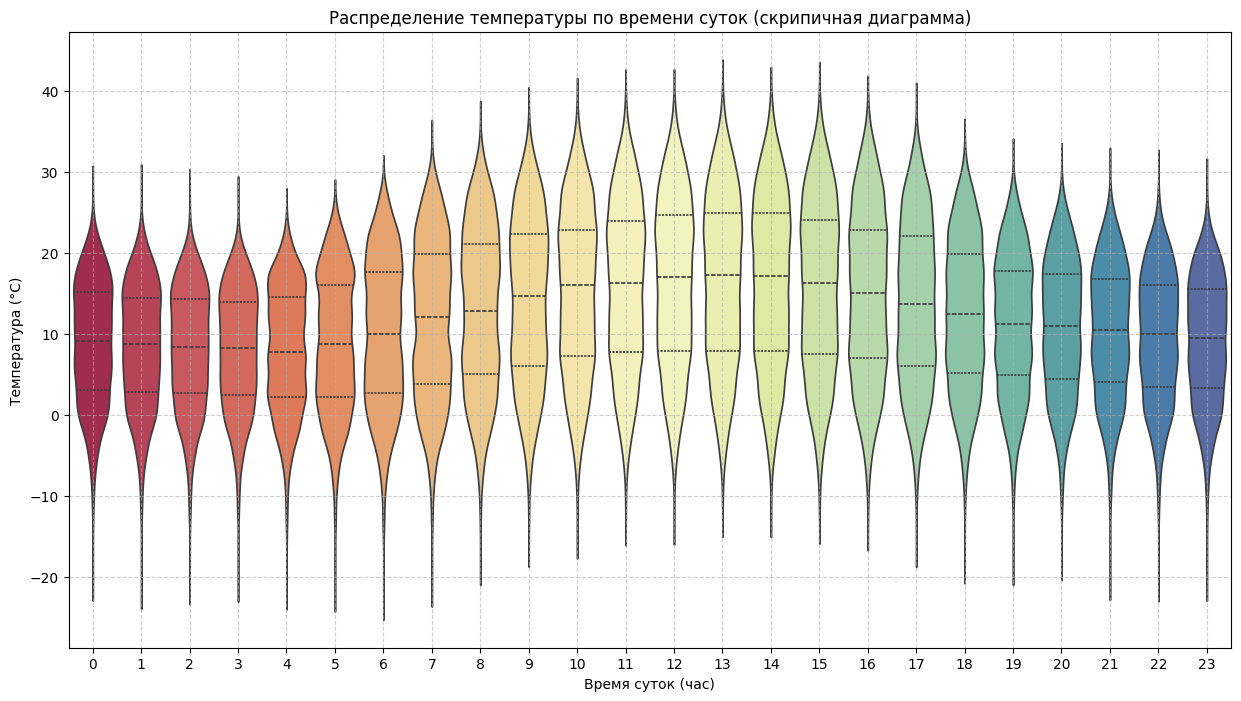

In [ ]:
df = pd.read_csv("weatherHistory_var1.csv")

# Преобразование даты и извлечение часа
df['Formatted Date'] = pd.to_datetime(df['Formatted Date'], utc=True)
df['Hour'] = df['Formatted Date'].dt.hour

# Создание скрипичного графика
plt.figure(figsize=(15, 8))
sns.violinplot(x='Hour', y='Temperature (C)', data=df, palette='Spectral', inner="quartile")
plt.title('Распределение температуры по времени суток (скрипичная диаграмма)')
plt.xlabel('Время суток (час)')
plt.ylabel('Температура (°C)')
plt.xticks(range(0, 24))
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

#Выводы по скрипичной диаграмме распределения температуры по времени суток:
#- Скрипичная диаграмма наглядно показывает распределение температуры для каждого часа суток.
#- Видна суточная динамика: в ночные и утренние часы распределение температур смещено влево (в сторону более низких температур) а в дневные - вправо.
#- Форма 'скрипок' для каждого часа показывает плотность распределения температур.
#- Медиана (белая точка внутри 'скрипки') повышается в дневные часы, а также видна форма квартилей.
#- График дает более подробную картину распределения, чем boxplot, и хорошо показывает